In [14]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import torch
from train.data.supervised import SupervisedAframeDataset

In [15]:
with h5py.File('/home/ethan.marx/aframev2/run/multi-gpu-old-data/batch.h5') as f:
    X = f['X'][...]
    y = f['y'][...]

In [16]:
mask = y[:,0] == 1
signals = X[mask]

In [18]:
signals.shape

(135, 2, 3072)

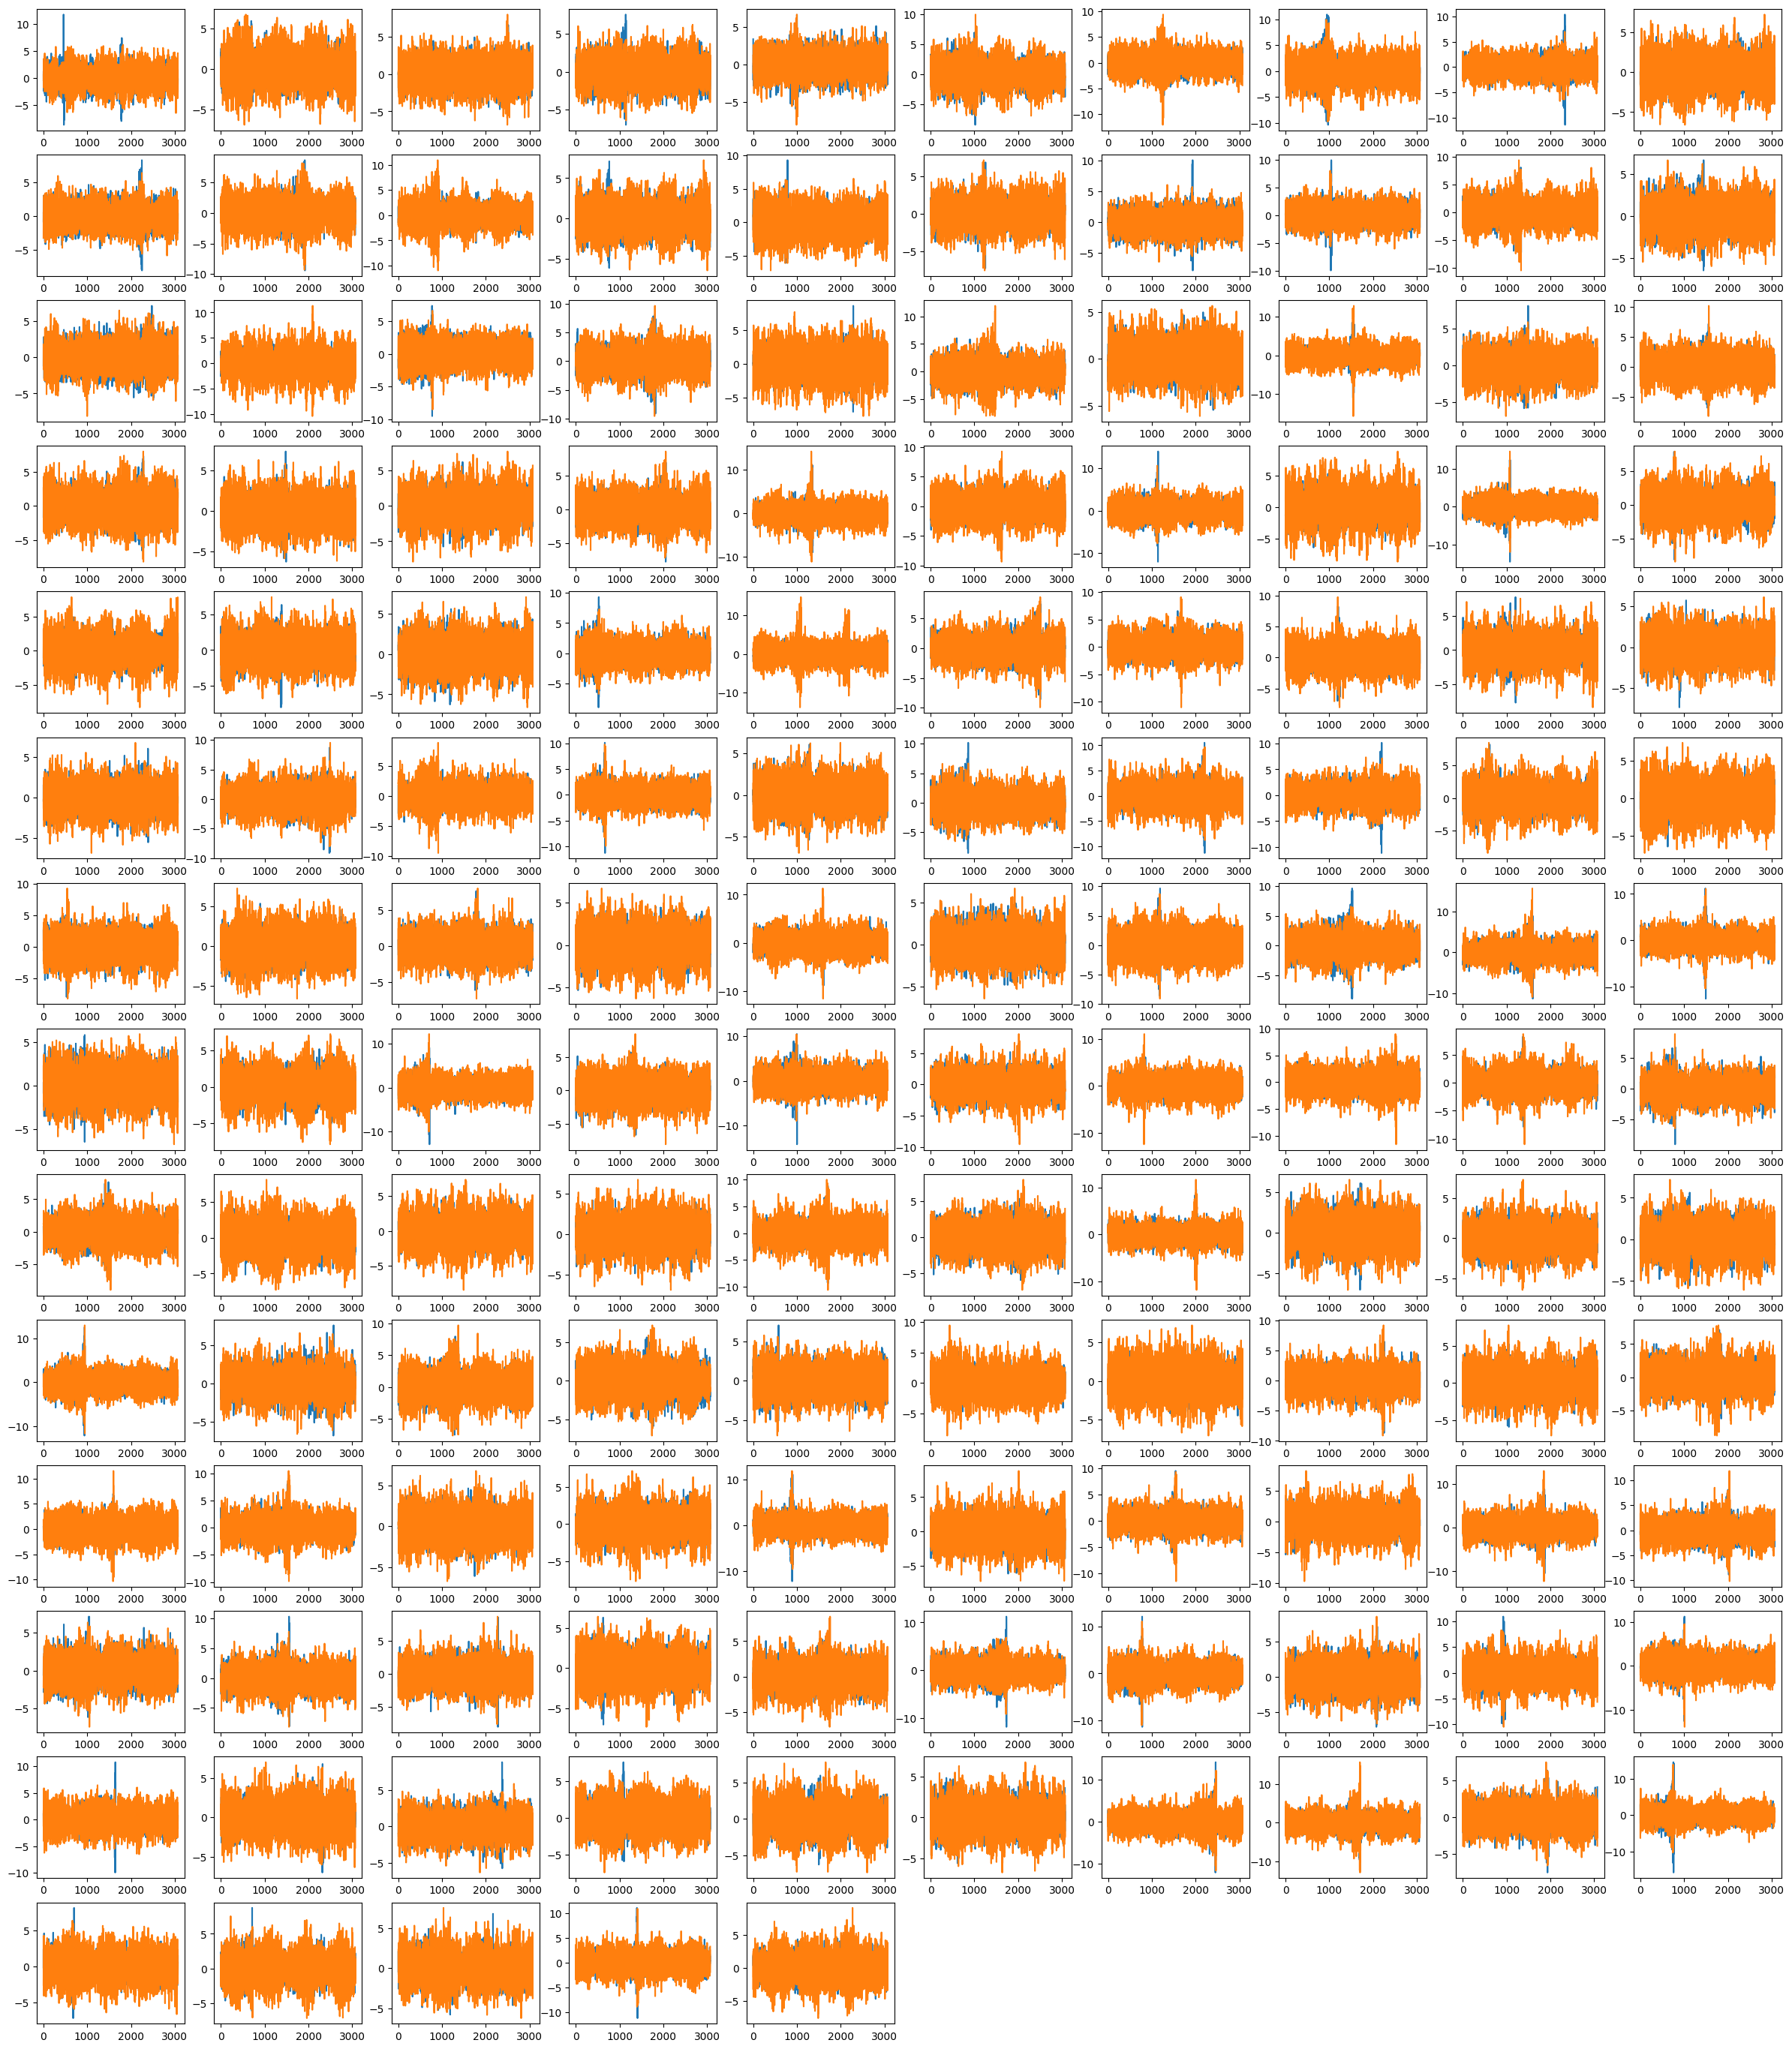

In [19]:
num = 135
rows = 20
cols = 10
plt.figure(figsize=(30, 50))
for i, x in enumerate(signals[:num]):
    plt.subplot(rows, cols, i + 1)
    plt.plot(x[1])
    plt.plot(x[0])

In [11]:
data_dir = "/home/ethan.marx/aframe/methods-paper-data/train/"
ifos = ["H1", "L1"]
valid_frac = 0.25
kernel_length = 1.5
fduration = 1
psd_length = 8
max_snr = 100
snr_thresh = 4
batch_size = 512
waveform_prob = 0.277
trigger_pad = -0.75
valid_stride = 0.5
swap_frac = 0.014
mute_frac = 0.055


In [12]:
dataset = SupervisedAframeDataset(
    data_dir,
    ifos,
    valid_frac,
    batch_size,
    kernel_length,
    fduration,
    psd_length,
    max_snr = 2000,
    snr_thresh=snr_thresh,
    valid_stride = valid_stride,
    waveform_prob = waveform_prob,
    trigger_pad = -0.75,
    swap_frac = 0.014,
    mute_frac = mute_frac,
    highpass = 32
)

In [13]:
dataset.setup("train")

ValueError: too many values to unpack (expected 2)

In [5]:
print(dataset.hparams.highpass)

32


In [6]:
class Trainer:
    accelerator = None
    device_ids = [0]

In [7]:
dataset.trainer = Trainer

In [8]:
train_dataloader = dataset.train_dataloader()

In [9]:
#batch = torch.zeros(1, 512, 2, int(2048 * 10.5))

In [10]:
batch = next(iter(train_dataloader))

In [11]:
augmented, y, psds, background = dataset.augment(batch[0])

In [12]:
background.shape

torch.Size([512, 2, 16384])

In [13]:
mask = y[:, 0] == 1
signals = augmented[mask]
noise = augmented[~mask]

In [14]:
bad_ifo = signals[:, 1, :]
bad = (bad_ifo < 0.1).all(dim=1)

In [15]:
bad_psds = psds[mask][bad]
good_psds = psds[mask][~bad]
bad_background = background[mask][bad]
good_background = background[mask][~bad]

In [16]:
plt.loglog(bad_psds[3][0].numpy())
plt.loglog(bad_psds[3][1].numpy())

IndexError: index 3 is out of bounds for dimension 0 with size 0

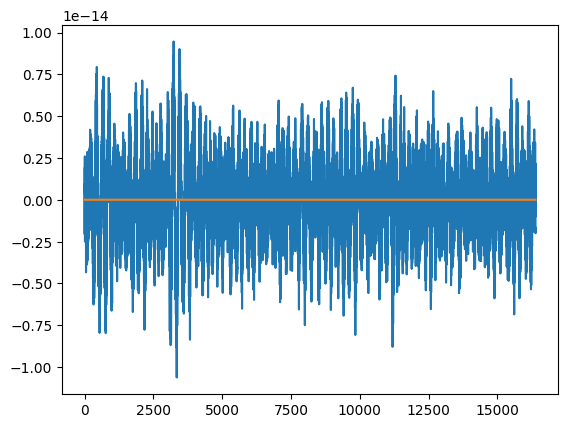

In [ ]:
plt.plot(bad_background[3][1].numpy())
plt.plot(bad_background[3][0].numpy())

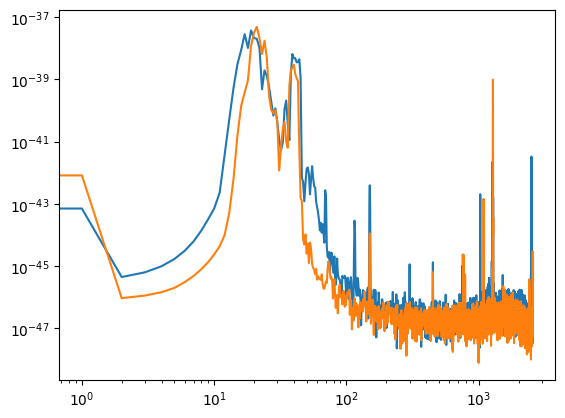

In [ ]:
plt.loglog(good_psds[0][0].numpy())
plt.loglog(good_psds[0][1].numpy())

In [ ]:
bad_signals = signals[bad]

In [ ]:
bad_signals.shape

torch.Size([52, 2, 3072])

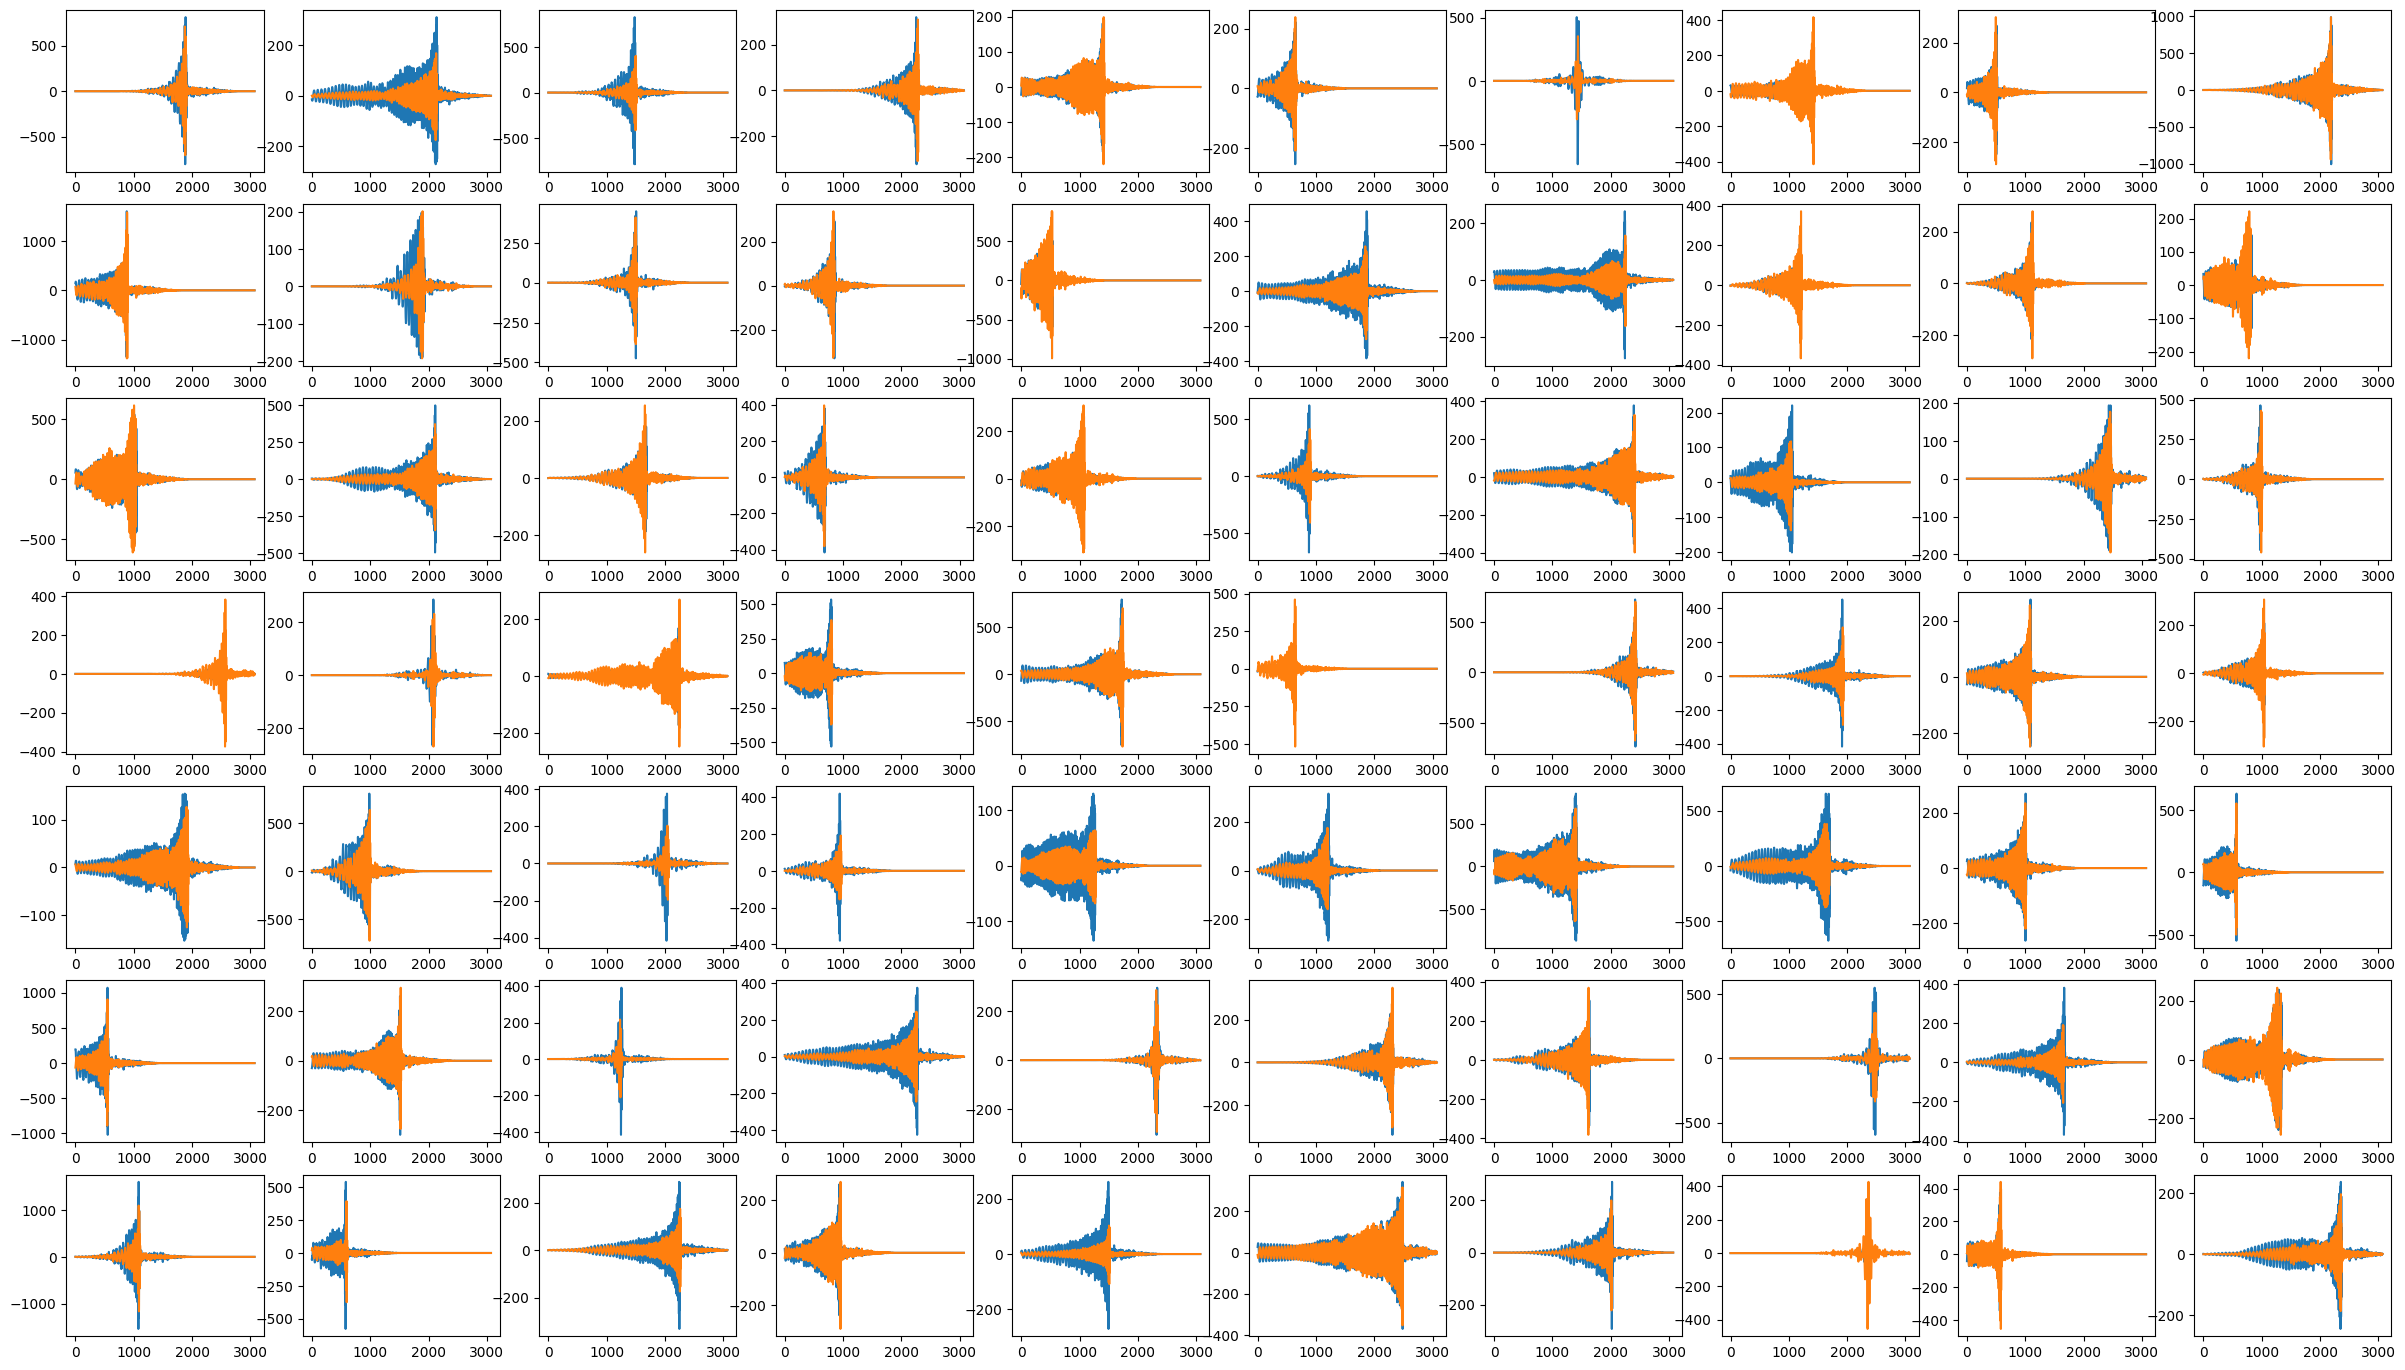

In [18]:
num = 70
rows = 20
cols = 10
plt.figure(figsize=(30, 50))
for i, x in enumerate(signals[:num]):
    plt.subplot(rows, cols, i + 1)
    plt.plot(x[1])
    plt.plot(x[0])


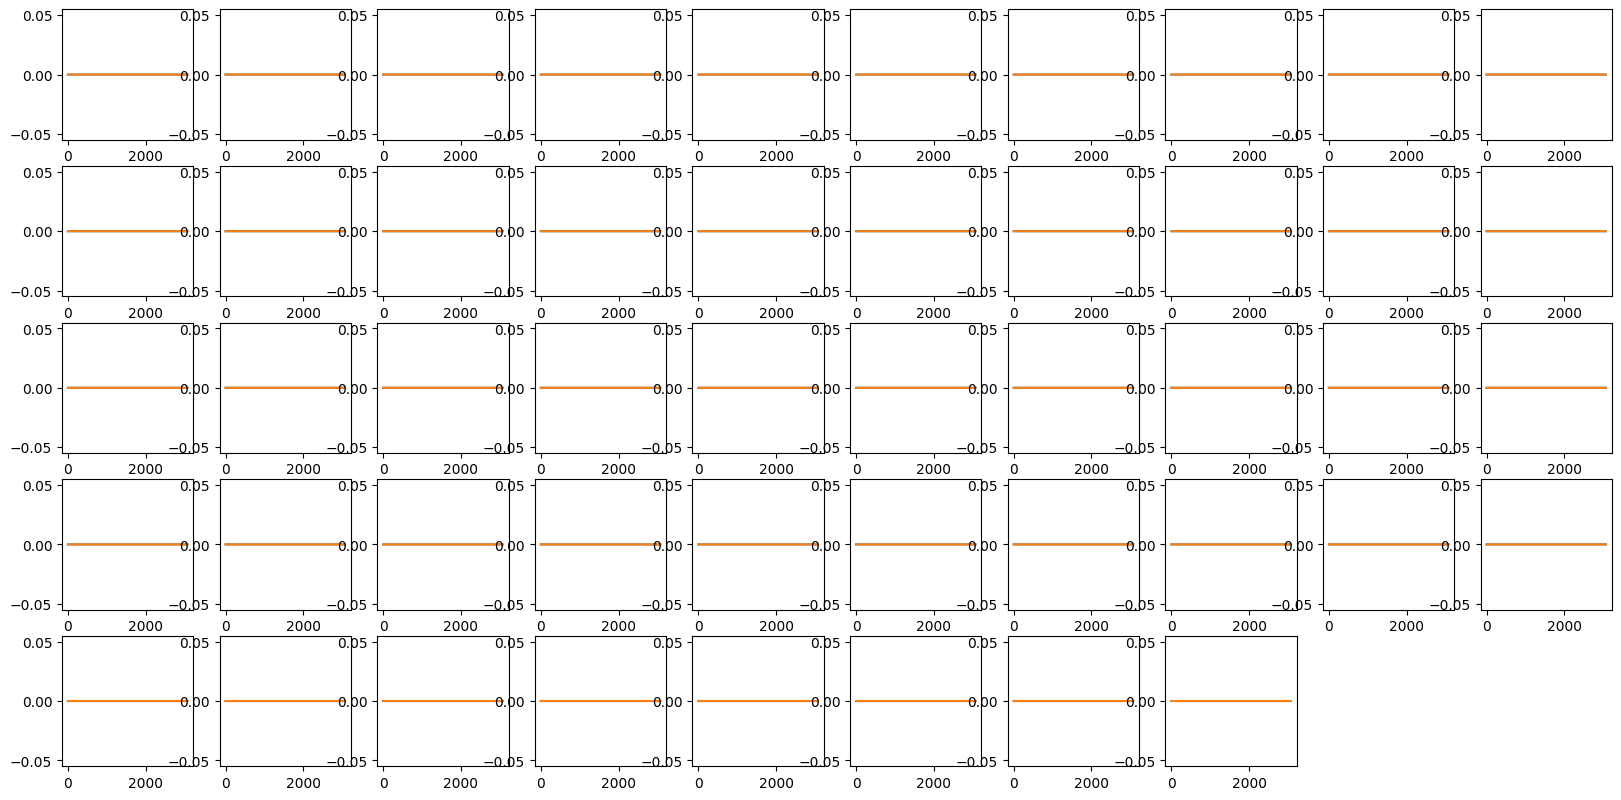

In [ ]:
num = 100
rows = 10
cols = rows
plt.figure(figsize=(20, 20))
for i, x in enumerate(noise[:num]):
    plt.subplot(rows, cols, i + 1)
    plt.plot(x[0])
    plt.plot(x[1])

In [ ]:
with h5py.File("/home/ethan.marx/aframev2/run/lr_factor/batch.h5") as f:
    X = f["X"][:]
    y = f["y"][:]

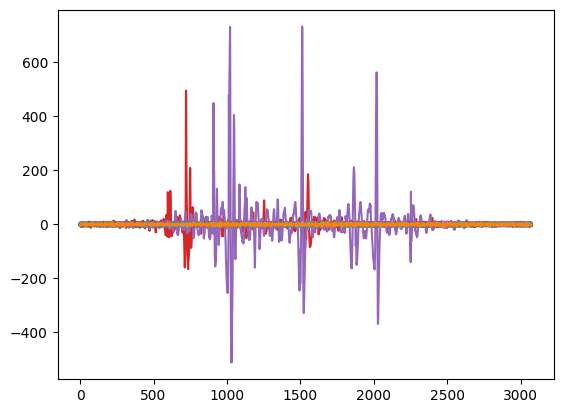

In [ ]:
for x in X:
    plt.plot(x[0])

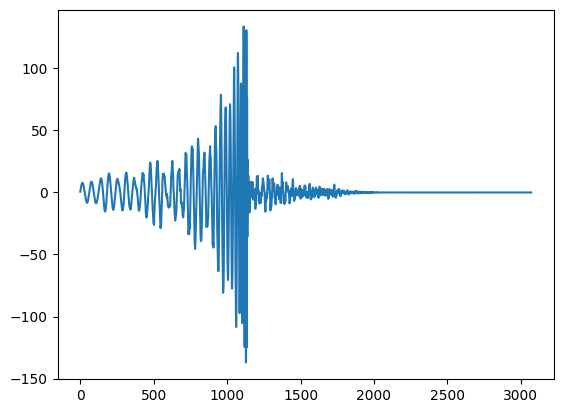

In [ ]:
plt.plot(signals[34][0])

In [ ]:
print(X.shape)
print(y.shape)

(512, 2, 3072)
(512, 1)


In [ ]:
mask = np.where(y)

In [ ]:
signals = X[mask]

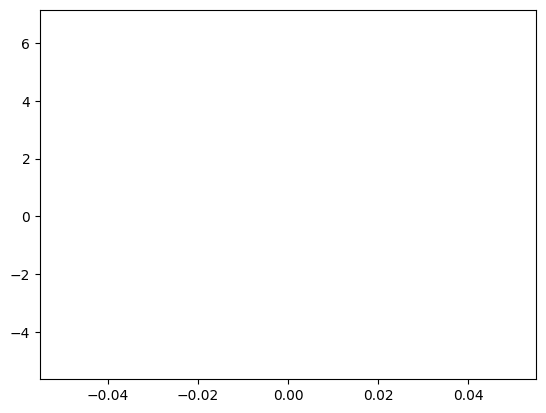

In [ ]:
for signal in signals:
    plt.plot(signal[1])

In [ ]:
shifts = zip(itertools.count(1, 1), itertools.count(-1, -1))
shifts = itertools.chain.from_iterable(shifts)

NameError: name 'itertools' is not defined

In [ ]:
timeslides_per_dev = [[]]
current_steps = sum([t.num_steps for t in timeslides_per_dev[-1]])

In [ ]:
for shift in shifts:
    print(shift)

In [ ]:
shifts = itertools.chain.from_iterable(shifts)
shifts = itertools.takewhile(lambda _: livetime > 0, shifts)